# Explaining Machine Learning Models

- Office Hours for 022221FT
- 05/19/21

## Overview

- Fit an SVC and RandomForest model on our new data set. 
- Discuss 3 different methods for interpreting the models' results and what features it used to make its predictions. 
    - Permutation Importance
    - Using `SHAP` and Shapely Values
    - Using `LIME`

## Questions

- [Google Doc](https://docs.google.com/document/d/1TFMucUZQPhGX6eGvhUpSlrByKHswgC30SUfybcuu6Hw/edit#)

## Notebook Headers for Study Group

- ⭐️**EXPLAINING MACHINE LEARNING MODELS**⭐️
    - All of today's content.
-  📚**Shap Resources**
    - Collection of Videos, Book Excerpts, and Blogs.

___

# Predicing Drug Use

## Goal

- To predict if someone is a heroin user and to use the model to gain insights into risk factors for using heroin. 

## Data

- Drug Consumption Survey: 
    - http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

- Data Set contains information about previous drug use for many classes of drugs, demographic data such as education, age, country, and personality scores for several metrics.
    - Nscore
    - Escore	
    - Oscore	
    - Ascore	
    - Cscore	
    - Impulsiveness	
    - SS

>- This dataset has already been heavily pre-processed to restore the orignal values of the dataset before the dataset providers encoded features. 
    - See `reference`>`Feature Selection - data-renaming.ipynb`" [GitHub notebook Link](https://github.com/jirvingphd/dsc-phase-3-project/blob/9258a878234c98d13a48204131fa09eb9171f445/reference/Feature%20Selection%20-%20data-renaming.ipynb)

### Imports and Functions

In [1]:
## Import pd, sns, plt, np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE,SMOTENC


## Models & Utils
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from time import time

In [3]:
# ## Changing Pandas Options to see full columns in previews and info
n=200
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
# pd.set_option('display.float_format',lambda x: f"{x:.2f}")

### Modeling Functionx (WIP)_

In [4]:
!pip install tzlocal

Defaulting to user installation because normal site-packages is not writeable


In [5]:
%load_ext autoreload
%autoreload 2

import project_functions as pf

## Preprocessing

In [6]:
# df = pd.read_csv('https://raw.githubusercontent.com/jirvingphd/dsc-phase-3-project/main/data/drug_use_renamed_converted.csv')#'data/drug_use_renamed_converted.csv')
# df

In [7]:
fname = 'Data/drug_use_renamed_converted.csv.gz'
# df.to_csv(fname,compression='gzip',index=False)
df= pd.read_csv(fname)
df

ID    Age  Gender                                          Education  \
0        1  35-44  Female                  Professional certificate/ diploma   
1        2  25-34    Male                                   Doctorate degree   
2        3  35-44    Male                  Professional certificate/ diploma   
3        4  18-24  Female                                     Masters degree   
4        5  35-44  Female                                   Doctorate degree   
...    ...    ...     ...                                                ...   
1880  1884  18-24  Female  Some college or university, no certificate or ...   
1881  1885  18-24    Male  Some college or university, no certificate or ...   
1882  1886  25-34  Female                                  University degree   
1883  1887  18-24  Female  Some college or university, no certificate or ...   
1884  1888  18-24    Male  Some college or university, no certificate or ...   

                  Country          Ethnicity  Nscore  Escore  Oscore  Ascore  \
0                      UK  Mixed-White/Asian    39.0    36.0    42.0    37.0   
1                      UK              White    29.0    52.0    55.0    48.0   
2                      UK              White    31.0    45.0    40.0    32.0   
3                      UK              White    34.0    34.0    46.0    47.0   
4                      UK              White    43.0    28.0    43.0    41.0   
...                   ...                ...     ...     ...     ...     ...   
1880                  USA              White    25.0    51.0    57.0    48.0   
1881                  USA              White    33.0    51.0    50.0    48.0   
1882                  USA              White    47.0    30.0    37.0    31.0   
1883                  USA              White    45.0    26.0    48.0    32.0   
1884  Republic of Ireland              White    31.0    53.0    56.0    50.0   

      Cscore  Impulsiveness       SS             Alcohol  \
0       42.0       -0.21712 -1.18084   Used in Last Week   
1       41.0       -0.71126 -0.21575   Used in Last Week   
2       34.0       -1.37983  0.40148    Used in Last Day   
3       46.0       -1.37983 -1.18084  Used in Last Month   
4       50.0       -0.21712 -0.21575  Used in Last Month   
...      ...            ...      ...                 ...   
1880    33.0        0.88113  1.92173   Used in Last Week   
1881    30.0        0.88113  0.76540   Used in Last Week   
1882    31.0        0.52975 -0.52593  Used in Last Month   
1883    22.0        1.29221  1.22470   Used in Last Week   
1884    45.0        0.88113  1.22470  Used in Last Month   

                      Amphet                    Amyl               Benzos  \
0        Used in Last Decade              Never Used  Used in Last Decade   
1        Used in Last Decade     Used in Last Decade           Never Used   
2                 Never Used              Never Used           Never Used   
3                 Never Used              Never Used    Used in Last Year   
4     Used over a Decade Ago  Used over a Decade Ago           Never Used   
...                      ...                     ...                  ...   
1880              Never Used              Never Used           Never Used   
1881              Never Used              Never Used           Never Used   
1882        Used in Last Day       Used in Last Week    Used in Last Week   
1883              Never Used              Never Used           Never Used   
1884       Used in Last Year              Never Used    Used in Last Year   

                    Caff             Cannabis                Choc  \
0       Used in Last Day           Never Used   Used in Last Week   
1       Used in Last Day   Used in Last Month    Used in Last Day   
2       Used in Last Day    Used in Last Year  Used in Last Month   
3      Used in Last Week  Used in Last Decade  Used in Last Month   
4       Used in Last Day    Used in Last Year    Used in Last Day   
...                  ...  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID               int64  
 1   Age              object 
 2   Gender           object 
 3   Education        object 
 4   Country          object 
 5   Ethnicity        object 
 6   Nscore           float64
 7   Escore           float64
 8   Oscore           float64
 9   Ascore           float64
 10  Cscore           float64
 11  Impulsiveness    float64
 12  SS               float64
 13  Alcohol          object 
 14  Amphet           object 
 15  Amyl             object 
 16  Benzos           object 
 17  Caff             object 
 18  Cannabis         object 
 19  Choc             object 
 20  Coke             object 
 21  Crack            object 
 22  Ecstasy          object 
 23  Heroin           object 
 24  Ketamine         object 
 25  LegalH           object 
 26  LSD              object 
 27  Meth             o

In [9]:
columns= {0:'ID',1:'Age',2:'Gender',3:'Education',4:'Country',5:'Ethnicity',
         6:'Nscore',7:'Escore',8:'Oscore',9:"Ascore",10:'Cscore',
         11:'Impulsiveness',12:'SS'}

drug_dict = {13:'Alcohol', 
              14: 'Amphet', 
              15: 'Amyl', 
              16: 'Benzos', 
              17: 'Caff', 
              18: 'Cannabis', 
              19: 'Choc', 
              20: 'Coke',
              21: 'Crack', 
              22: 'Ecstasy',
              23: 'Heroin', 
              24: 'Ketamine', 
              25: 'LegalH', 
              26: 'LSD',
              27: 'Meth',
              28: 'Mushrooms', 
              29: 'Nicotine', 
              30: "FakeDrugSemeron",
              31: 'VSA'}

all_columns = {**columns, **drug_dict}

drug_cols = list(drug_dict.values())
drug_cols

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'LegalH',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'FakeDrugSemeron',
 'VSA']

### Identifying Columns for Preprocessing

In [10]:
object_cols = list(df.drop(columns=drug_cols).select_dtypes('object').columns)
object_cols

['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

In [11]:
## Column Lists
ordinal_cols = ['Age','Education']
onehot_cols = ['Gender','Country', 'Ethnicity']

In [12]:
df.select_dtypes('object').drop(columns=[*drug_cols,*ordinal_cols,*onehot_cols])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1885 rows x 0 columns]

## Feature Engineering

### How to treat drug cols?

- Either encode as ordinal or bin into 3 bins ('never used','previous user','current user')

In [13]:
df['Heroin'].value_counts()

Never Used                1605
Used in Last Decade         94
Used over a Decade Ago      68
Used in Last Year           65
Used in Last Month          24
Used in Last Week           16
Used in Last Day            13
Name: Heroin, dtype: int64

In [14]:
df['Heroin'].unique()

array(['Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
       'Used in Last Year', 'Used in Last Week', 'Used in Last Day',
       'Used in Last Month'], dtype=object)

## Making New df for processing

In [15]:
df2 = df.copy()

### Binning Drug Use

In [16]:
druguse_cat_map = {'Never Used':'Non-User' , 
 'Used over a Decade Ago': 'Non-User',
 'Used in Last Decade':"User" ,
 'Used in Last Year': "User",
 'Used in Last Week': "User", 
 'Used in Last Day': "User",
 'Used in Last Month':"User"}
druguse_cat_map

{'Never Used': 'Non-User',
 'Used over a Decade Ago': 'Non-User',
 'Used in Last Decade': 'User',
 'Used in Last Year': 'User',
 'Used in Last Week': 'User',
 'Used in Last Day': 'User',
 'Used in Last Month': 'User'}

In [17]:
for col in drug_cols:
    df2[col] = df[col].replace(druguse_cat_map)
#     display(df2[col].value_counts(normalize=True, dropna=False))

In [18]:
df2['Heroin'].value_counts(1)

Non-User    0.887533
User        0.112467
Name: Heroin, dtype: float64

### Encoding Categorical Features (Ordinal)

In [19]:
ordinal_cols

['Age', 'Education']

### Age

In [20]:
## Making age map
age_map = {'18-24': 20,
           '25-34':30,
           '35-44':40, 
           '45-54':50,
           '55-64':60,
           '65+':70}

In [21]:
df2['Age'] = df['Age'].replace(age_map)#.value_counts(dropna=False)
df2['Age'].value_counts(dropna=False)

20    643
30    481
40    356
50    294
60     93
70     18
Name: Age, dtype: int64

### Education

In [22]:
df['Education'].value_counts(dropna=False)

Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       270
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: Education, dtype: int64

In [23]:
education_map = {"Left school before 16 years":0, 
                 "Left school at 16 years":1, 
                 "Left school at 17 years":2,
                 "Left school at 18 years":3,
                 "Some college or university, no certificate or degree":4,
                 "Professional certificate/ diploma":5,
                 "University degree":6, "Masters degree":7, "Doctorate degree":8}

df2["Education"] = df['Education'].replace(education_map)
df2['Education'].value_counts(dropna=False)

4    506
6    480
7    283
5    270
3    100
1     99
8     89
2     30
0     28
Name: Education, dtype: int64

In [24]:
df2

ID  Age  Gender  Education              Country          Ethnicity  \
0        1   40  Female          5                   UK  Mixed-White/Asian   
1        2   30    Male          8                   UK              White   
2        3   40    Male          5                   UK              White   
3        4   20  Female          7                   UK              White   
4        5   40  Female          8                   UK              White   
...    ...  ...     ...        ...                  ...                ...   
1880  1884   20  Female          4                  USA              White   
1881  1885   20    Male          4                  USA              White   
1882  1886   30  Female          6                  USA              White   
1883  1887   20  Female          4                  USA              White   
1884  1888   20    Male          4  Republic of Ireland              White   

      Nscore  Escore  Oscore  Ascore  Cscore  Impulsiveness       SS Alcohol  \
0       39.0    36.0    42.0    37.0    42.0       -0.21712 -1.18084    User   
1       29.0    52.0    55.0    48.0    41.0       -0.71126 -0.21575    User   
2       31.0    45.0    40.0    32.0    34.0       -1.37983  0.40148    User   
3       34.0    34.0    46.0    47.0    46.0       -1.37983 -1.18084    User   
4       43.0    28.0    43.0    41.0    50.0       -0.21712 -0.21575    User   
...      ...     ...     ...     ...     ...            ...      ...     ...   
1880    25.0    51.0    57.0    48.0    33.0        0.88113  1.92173    User   
1881    33.0    51.0    50.0    48.0    30.0        0.88113  0.76540    User   
1882    47.0    30.0    37.0    31.0    31.0        0.52975 -0.52593    User   
1883    45.0    26.0    48.0    32.0    22.0        1.29221  1.22470    User   
1884    31.0    53.0    56.0    50.0    45.0        0.88113  1.22470    User   

        Amphet      Amyl    Benzos  Caff  Cannabis  Choc      Coke     Crack  \
0         User  Non-User      User  User  Non-User  User  Non-User  Non-User   
1         User      User  Non-User  User      User  User      User  Non-User   
2     Non-User  Non-User  Non-User  User      User  User  Non-User  Non-User   
3     Non-User  Non-User      User  User      User  User      User  Non-User   
4     Non-User  Non-User  Non-User  User      User  User  Non-User  Non-User   
...        ...       ...       ...   ...       ...   ...       ...       ...   
1880  Non-User  Non-User  Non-User  User      User  User  Non-User  Non-User   
1881  Non-User  Non-User  Non-User  User      User  User  Non-User  Non-User   
1882      User      User      User  User      User  User      User  Non-User   
1883  Non-User  Non-User  Non-User  User      User  User  Non-User  Non-User   
1884      User  Non-User      User  User      User  User      User  Non-User   

       Ecstasy    Heroin  Ketamine    LegalH       LSD      Meth Mushrooms  \
0     Non-User  Non-User  Non-User  Non-User  Non-User  Non-User  Non-User   
1         User  Non-User      User  Non-User      User      User  Non-User   
2     Non-User  Non-User  Non-User  Non-User  Non-User  Non-User  Non-User   
3     Non-User  Non-User      User  Non-User  Non-User  Non-User  Non-User   
4     Non-User  Non-User  Non-User  Non-User  Non-User  Non-User      User   
...        ...       ...       ...       ...       ...       ...       ...   
1880  Non-User  Non-User  Non-User      User      User  Non-User  Non-User   
1881      User  Non-User  Non-User      User      User      User      User   
1882      User  Non-User      User  Non-User      User  Non-User      User   
1883      User  Non-User  Non-User      User      User  Non-User      User   
1884      User  Non-User  Non-User      User      User  Non-User      User   

      Nicotine FakeDrugSemeron       VSA  
0         User        Non-User  Non-User  
1         User        Non-User  Non-User  
2     Non-User        Non-User  Non-User  
3         User        Non-User  Non-User

# Preprocessing

In [25]:
## Specifying root names of types of features to loop through and filter out from df
target_col = 'Heroin'
drop_cols = ['ID']
target_map = {'Non-User':0, 'User':1}

y = df2[target_col].map(target_map).copy()
X = df2.drop(columns=[target_col,*drop_cols]).copy()
y.value_counts(1,dropna=False)

0    0.887533
1    0.112467
Name: Heroin, dtype: float64

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train

Age  Gender  Education              Country Ethnicity  Nscore  Escore  \
1812   20  Female          7                   UK     White    37.0    42.0   
948    20  Female          4                  USA     White    25.0    42.0   
1614   50    Male          5                   UK     White    39.0    41.0   
1415   30  Female          7  Republic of Ireland     White    34.0    38.0   
1102   20  Female          3                  USA     White    26.0    42.0   
...   ...     ...        ...                  ...       ...     ...     ...   
1853   20    Male          4                  USA     White    22.0    41.0   
1751   20    Male          4                  USA     White    26.0    41.0   
1773   20  Female          6                  USA     White    44.0    32.0   
1559   50  Female          0                   UK     White    38.0    38.0   
1581   40  Female          7                   UK     White    43.0    54.0   

      Oscore  Ascore  Cscore  Impulsiveness       SS   Alcohol    Amphet  \
1812    39.0    53.0    48.0       -0.71126 -1.18084      User      User   
948     57.0    47.0    41.0        2.90161  1.92173      User      User   
1614    38.0    47.0    46.0        0.52975 -0.52593      User  Non-User   
1415    37.0    54.0    40.0       -1.37983 -1.18084      User  Non-User   
1102    57.0    37.0    28.0        0.19268  0.76540      User  Non-User   
...      ...     ...     ...            ...      ...       ...       ...   
1853    58.0    41.0    42.0        0.88113  0.40148      User      User   
1751    49.0    27.0    30.0        0.88113  1.92173      User  Non-User   
1773    55.0    45.0    49.0        0.88113  1.92173      User  Non-User   
1559    37.0    39.0    40.0       -0.21712 -0.52593  Non-User  Non-User   
1581    47.0    54.0    43.0        0.19268  0.76540      User  Non-User   

          Amyl    Benzos  Caff  Cannabis      Choc      Coke     Crack  \
1812      User      User  User      User      User      User  Non-User   
948   Non-User  Non-User  User      User      User      User  Non-User   
1614  Non-User      User  User  Non-User      User  Non-User  Non-User   
1415      User      User  User  Non-User      User  Non-User  Non-User   
1102  Non-User  Non-User  User      User      User  Non-User  Non-User   
...        ...       ...   ...       ...       ...       ...       ...   
1853  Non-User      User  User      User      User      User      User   
1751  Non-User  Non-User  User      User      User  Non-User  Non-User   
1773  Non-User      User  User      User      User      User  Non-User   
1559  Non-User  Non-User  User  Non-User      User  Non-User  Non-User   
1581  Non-User  Non-User  User  Non-User  Non-User  Non-User  Non-User   

       Ecstasy  Ketamine    LegalH       LSD      Meth Mushrooms  Nicotine  \
1812      User      User      User      User  Non-User      User      User   
948       User  Non-User      User      User  Non-User      User      User   
1614  Non-User  Non-User  Non-User  Non-User  Non-User  Non-User  Non-User   
1415  Non-User  Non-User  Non-User  Non-User  Non-User  Non-User  Non-User   
1102      User  Non-User  Non-User  Non-User  Non-User  Non-User  Non-User   
...        ...       ...       ...       ...       ...       ...       ...   
1853      User      User      User      User      User      User      User   
1751      User  Non-User  Non-User  Non-User      User  Non-User      User   
1773      User  Non-User      User      User      User      User      User   
1559  Non-User  Non-User  Non-User  Non-User  Non-User  Non-User      User   
1581  Non-User  Non-User  Non-User  Non-User  Non-User  Non-User      User   

     FakeDrugSemeron       VSA  
1812        Non-User  Non-User  
948         Non-User  Non-User  
1614        Non-User  Non-User  
1415        Non-User  Non-User  
1102        Non-User  Non-User  
...              ...       ...  
1853        Non-User  Non-User  
1751        Non-User  Non-User  
1773        Non-User 

In [27]:
from sklearn import set_config
set_config(display='diagram')

In [28]:
## saving list of numeric vs categorical feature
num_cols = list(X_train.select_dtypes('number').columns)
cat_cols = list(X_train.select_dtypes('object').columns)

## create pipelines and column transformer
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False,drop='first'))
])

print('# of num_cols:',len(num_cols))
print('# of cat_cols:',len(cat_cols))

# of num_cols: 9
# of cat_cols: 21


In [29]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', MinMaxScaler())]),
                                 ['Age', 'Education', 'Nscore', 'Escore',
                                  'Oscore', 'Ascore', 'Cscore', 'Impulsiveness',
                                  'SS']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['Gender', 'Country', 'Ethnicity', 'Alcohol',
                                  'Amphet', 'Amyl', 'Benzos', 'Caff',
                                  'Cannabis', 'Choc', 'Coke', 'Crack',
                                  'Ecstasy', 'Ketamine', 'LegalH', 'LSD',
                                  'Meth', 'Mushrooms', 'Nicotine',
                                  'FakeDrugSemeron', 'VSA'])])

In [30]:
## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
preprocessor.fit(X_train)

## Use the encoder's .get_feature_names
cat_features = list(preprocessor.named_transformers_['cat'].named_steps['encoder']\
                            .get_feature_names(cat_cols))
X_cols = num_cols+cat_features

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env-m1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
## Transform X_traian,X_test and remake dfs
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          index=X_train.index, columns=X_cols)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          index=X_test.index, columns=X_cols)

## Tranform X_train and X_test and make into DataFrames
X_train_df

Age  Education    Nscore    Escore    Oscore    Ascore    Cscore  \
1812  0.0      0.875  0.520833  0.604651  0.416667  0.854167  0.738095   
948   0.0      0.500  0.270833  0.604651  0.916667  0.729167  0.571429   
1614  0.6      0.625  0.562500  0.581395  0.388889  0.729167  0.690476   
1415  0.2      0.875  0.458333  0.511628  0.361111  0.875000  0.547619   
1102  0.0      0.375  0.291667  0.604651  0.916667  0.520833  0.261905   
...   ...        ...       ...       ...       ...       ...       ...   
1853  0.0      0.500  0.208333  0.581395  0.944444  0.604167  0.595238   
1751  0.0      0.500  0.291667  0.581395  0.694444  0.312500  0.309524   
1773  0.0      0.750  0.666667  0.372093  0.861111  0.687500  0.761905   
1559  0.6      0.000  0.541667  0.511628  0.361111  0.562500  0.547619   
1581  0.4      0.875  0.645833  0.883721  0.638889  0.875000  0.619048   

      Impulsiveness        SS  Gender_Male  Country_Canada  \
1812       0.337920  0.224398          0.0             0.0   
948        1.000000  1.000000          0.0             0.0   
1614       0.565343  0.388117          1.0             0.0   
1415       0.215401  0.224398          0.0             0.0   
1102       0.503573  0.710933          0.0             0.0   
...             ...       ...          ...             ...   
1853       0.629735  0.619957          1.0             0.0   
1751       0.629735  1.000000          1.0             0.0   
1773       0.629735  1.000000          0.0             0.0   
1559       0.428474  0.388117          0.0             0.0   
1581       0.503573  0.710933          0.0             0.0   

      Country_New Zealand  Country_Other  Country_Republic of Ireland  \
1812                  0.0            0.0                          0.0   
948                   0.0            0.0                          0.0   
1614                  0.0            0.0                          0.0   
1415                  0.0            0.0                          1.0   
1102                  0.0            0.0                          0.0   
...                   ...            ...                          ...   
1853                  0.0            0.0                          0.0   
1751                  0.0            0.0                          0.0   
1773                  0.0            0.0                          0.0   
1559                  0.0            0.0                          0.0   
1581                  0.0            0.0                          0.0   

      Country_UK  Country_USA  Ethnicity_Black  Ethnicity_Mixed-Black/Asian  \
1812         1.0          0.0              0.0                          0.0   
948          0.0          1.0              0.0                          0.0   
1614         1.0          0.0              0.0                          0.0   
1415         0.0          0.0              0.0                          0.0   
1102         0.0          1.0              0.0                          0.0   
...          ...          ...              ...                          ...   
1853         0.0          1.0              0.0                          0.0   
1751         0.0          1.0              0.0                          0.0   
1773         0.0          1.0              0.0                          0.0   
1559         1.0          0.0              0.0                          0.0   
1581         1.0          0.0              0.0                          0.0   

      Ethnicity_Mixed-White/Asian  Ethnicity_Mixed-White/Black  \
1812                          0.0                          0.0   
948                           0.0                          0.0   
1614                          0.0                          0.0   
1415                          0.0                          0.0   
1102                          0.0                          0.0   
...                           ...                          ...   
1853                          0.0                          0.0   
1751              

In [32]:
y.value_counts(1)

0    0.887533
1    0.112467
Name: Heroin, dtype: float64

## Resampling with SMOTENC

In [33]:
y_train.value_counts(1)

0    0.890304
1    0.109696
Name: Heroin, dtype: float64

In [34]:
## Save list of trues and falses for each cols
smote_feats = [False]*len(num_cols) +[True]*len(cat_features)
# smote_feats

In [35]:
## resample training data
smote = SMOTENC(smote_feats)
X_train_sm,y_train_sm = smote.fit_resample(X_train_df,y_train)
y_train_sm.value_counts()

0    1258
1    1258
Name: Heroin, dtype: int64

# MODELING

#### Setting `train_test_list`

In [36]:
### SAVING XY DATA TO LIST TO UNPACK
train_test_list = [X_train_sm,y_train_sm,X_test_df,y_test]

## Linear SVC

[i] Training started at 05/20/22-14:58:26:
	Training time was 0.0325 seconds.

           Train  Test  Difference
accuracy   0.94  0.91        0.03 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       415
           1       0.60      0.75      0.67        57

    accuracy                           0.91       472
   macro avg       0.78      0.84      0.81       472
weighted avg       0.92      0.91      0.91       472



/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env-m1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env-m1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


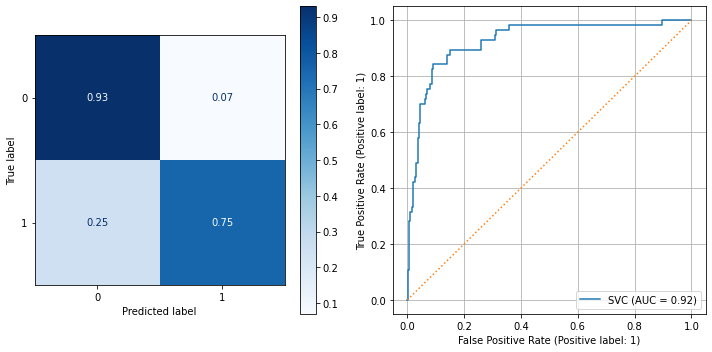

SVC(C=1, kernel='linear')

In [37]:
svc_linear = SVC(kernel='linear',C=1)
pf.fit_and_time_model(svc_linear,*train_test_list)

## RandomForest

[i] Training started at 05/20/22-14:58:26:
	Training time was 0.1664 seconds.

           Train  Test  Difference
accuracy    1.0  0.92        0.08 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       415
           1       0.68      0.67      0.67        57

    accuracy                           0.92       472
   macro avg       0.82      0.81      0.81       472
weighted avg       0.92      0.92      0.92       472



/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env-m1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env-m1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


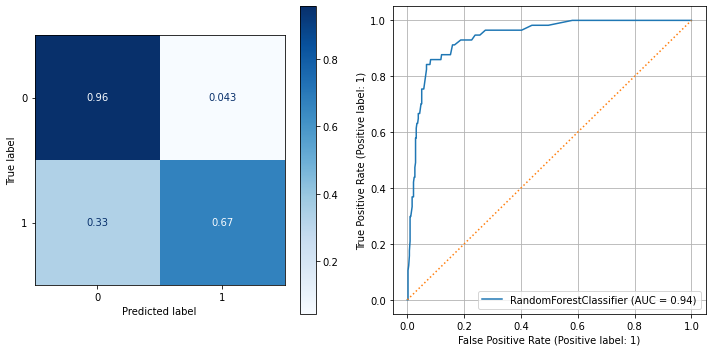

RandomForestClassifier()

In [38]:
rf = RandomForestClassifier()
pf.fit_and_time_model(rf,*train_test_list)

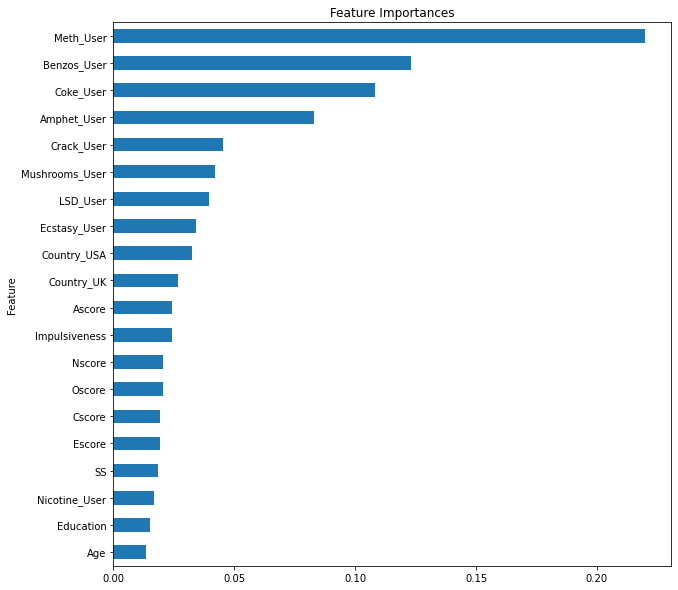

In [39]:
pf.get_importance(rf,X_test_df);

# ⭐️**EXPLAINING MACHINE LEARNING MODELS**⭐️

## Overview

- We will discuss/demo 3 methods of interpreting machine learning models. 
    1. Using Permutation Importance (from scikit-learn)
    2. Using `SHAP` model explainers
    3. Using `LIME` instance explainers

## Permutation Importance

> Permutation Importances will iteratively shuffle the rows of a single feature at a time to asses the model's change in performance with that feature's relationship with the target disrupted. 
- https://scikit-learn.org/stable/modules/permutation_importance.html

```python
from sklearn.inspection import permutation_importance
r = permutation_importance(svc_linear, X_test_df, y_test, n_repeats=30)
r.keys()
```
- Interesting Observation: 
    - permutation_importance takes a `scoring` argument!

> "**Warning Features that are deemed of low importance for a bad model (low cross-validation score) could be very important for a good model.** Therefore it is always important to evaluate the predictive power of a model using a held-out set (or better with cross-validation) prior to computing importances. Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model."

In [40]:
from sklearn.inspection import permutation_importance

In [41]:
## Permutation importance takes a fit mode and test data. 
r = permutation_importance(svc_linear, X_test_df, y_test,
                           n_repeats=30,scoring='f1')
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [42]:
r['importances_mean']

array([ 7.69506676e-03,  3.41880342e-04,  1.05405238e-02,  3.41880342e-04,
        2.08333333e-03,  1.14098837e-02,  2.39316239e-03,  8.67248062e-03,
        2.73504274e-03, -2.25694444e-03, -5.23567367e-04,  0.00000000e+00,
        1.38888889e-03, -3.70074342e-18,  5.55555556e-03,  7.29166667e-03,
        0.00000000e+00, -3.70074342e-18,  1.70940171e-04,  0.00000000e+00,
       -3.70074342e-18,  2.08333333e-03,  1.70940171e-04, -3.29861111e-03,
        0.00000000e+00,  1.76537439e-01,  0.00000000e+00,  7.25366753e-03,
        0.00000000e+00,  3.03897808e-01, -5.18019529e-03, -3.64583333e-03,
        6.35932220e-03,  2.73504274e-03, -3.64583333e-03,  3.78869349e-01,
        0.00000000e+00, -1.68143565e-04,  0.00000000e+00,  0.00000000e+00])

In [43]:
## can make the mean importances into a series
svc_importances = pd.Series(r['importances_mean'],index=X_train_df.columns,
                           name = 'svc permutation importance')
svc_importances

Age                            7.695067e-03
Education                      3.418803e-04
Nscore                         1.054052e-02
Escore                         3.418803e-04
Oscore                         2.083333e-03
Ascore                         1.140988e-02
Cscore                         2.393162e-03
Impulsiveness                  8.672481e-03
SS                             2.735043e-03
Gender_Male                   -2.256944e-03
Country_Canada                -5.235674e-04
Country_New Zealand            0.000000e+00
Country_Other                  1.388889e-03
Country_Republic of Ireland   -3.700743e-18
Country_UK                     5.555556e-03
Country_USA                    7.291667e-03
Ethnicity_Black                0.000000e+00
Ethnicity_Mixed-Black/Asian   -3.700743e-18
Ethnicity_Mixed-White/Asian    1.709402e-04
Ethnicity_Mixed-White/Black    0.000000e+00
Ethnicity_Other               -3.700743e-18
Ethnicity_White                2.083333e-03
Alcohol_User                   1

In [44]:
r = permutation_importance(rf, X_test_df, y_test, n_repeats=30, scoring='f1')
rf_importances = pd.Series(r['importances_mean'],index=X_test_df.columns,
                          name= 'rf permutation importance')
rf_importances

Age                           -0.012036
Education                      0.012572
Nscore                        -0.001564
Escore                        -0.018573
Oscore                        -0.009320
Ascore                        -0.006271
Cscore                        -0.017833
Impulsiveness                  0.000726
SS                            -0.008201
Gender_Male                    0.008110
Country_Canada                 0.005120
Country_New Zealand            0.000000
Country_Other                 -0.000776
Country_Republic of Ireland    0.000000
Country_UK                     0.016954
Country_USA                   -0.017713
Ethnicity_Black                0.000000
Ethnicity_Mixed-Black/Asian    0.000000
Ethnicity_Mixed-White/Asian   -0.000388
Ethnicity_Mixed-White/Black    0.000000
Ethnicity_Other               -0.011651
Ethnicity_White               -0.000181
Alcohol_User                   0.000197
Amphet_User                    0.062681
Amyl_User                     -0.000957


Age                            0.013588
Education                      0.014934
Nscore                         0.020657
Escore                         0.019349
Oscore                         0.020563
Ascore                         0.024198
Cscore                         0.019381
Impulsiveness                  0.024050
SS                             0.018455
Gender_Male                    0.009993
Country_Canada                 0.003428
Country_New Zealand            0.000017
Country_Other                  0.001638
Country_Republic of Ireland    0.000773
Country_UK                     0.026879
Country_USA                    0.032631
Ethnicity_Black                0.000127
Ethnicity_Mixed-Black/Asian    0.000020
Ethnicity_Mixed-White/Asian    0.000396
Ethnicity_Mixed-White/Black    0.000321
Ethnicity_Other                0.001337
Ethnicity_White                0.002115
Alcohol_User                   0.001014
Amphet_User                    0.082949
Amyl_User                      0.004729


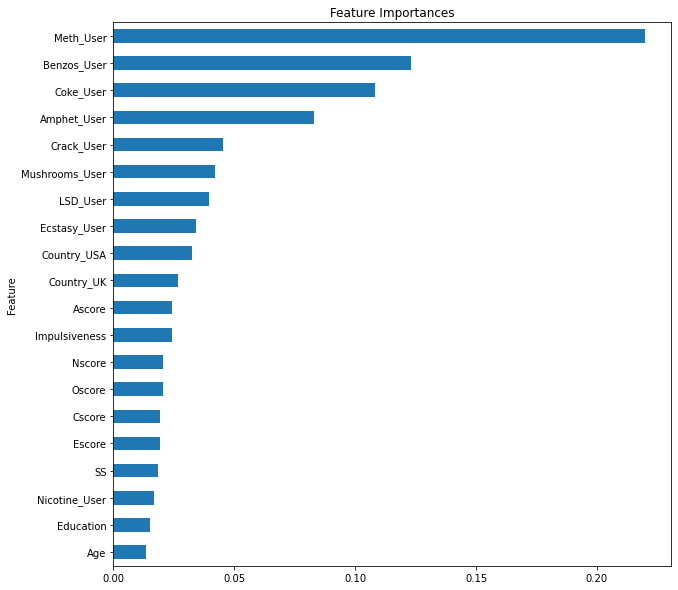

In [45]:
embedded_importances = pf.get_importance(rf,X_test_df)#,plot=False)
embedded_importances.name ='rf.feature_importances_'
embedded_importances

In [46]:
def compare_importances(*importances,sort_index=True,sort_col=0,show_bar=False):
    """Accepts Series of feature importances to concat.
    
    Args:
        *importances (Seires): seires to concat (recommended to pre-set names of Series)
        sort_index (bool, default=True): return series sorted by index. 
                            If False, sort seires by sort_col  #
        sort_col (int, default=0): If sort_index=False, sort df by this column #
        show_bar (bool, default=False): If show_bar, returns a pandas styler instead of df
                                        with the importances plotted as bar graphs
        
    Returns:
        DataFrame: featutre importances     
    
        """
    ## Concat Importances
    compare_importances = pd.concat(importances,axis=1)
    
    ## Sort DF by index or by sort_col
    if sort_index:
        compare_importances = compare_importances.sort_index()
    else:
        sort_col_name = compare_importances.columns[sort_col]
        compare_importances= compare_importances.sort_values(sort_col_name,ascending=False)
        
    ## If show bar, return pandas styler with in-cell bargraphs
    if show_bar:
        return compare_importances.style.bar().set_caption('Feature Importances')
    else:
        return compare_importances

In [47]:
## Compare embedded feature importance vs permutation importance
comp = compare_importances(embedded_importances,rf_importances,#svc_importances,
                          show_bar=True,sort_index=False,sort_col=0)
comp

In [48]:
# df['']

In [49]:
## Compare embedded feature importance vs permutation importance
comp = compare_importances(embedded_importances,rf_importances,svc_importances,
                          show_bar=True,sort_col=-1,sort_index=False)
comp

## Using SHAP and Shapely Values for Model Interpretation

###  📚**Shap Resources**

>- SHAP (SHapley Additive exPlanations)) 
    - [Repository](https://github.com/slundberg/shap)
    - [Documentation](https://shap.readthedocs.io/en/latest/?badge=latest)
        - Install via pip or conda.
  

- SHAP uses game theory to calcualte Shapely values for each feature in the dataset. 
- Shapely values are calculated by iteratively testing each feature's contribution to the model by comparing the model's  performance with vs. without the feature. (The "marginal contribution" of the feature to the model's performance).



#### Papers, Book Excerpts, and  Blogs
- [White Paper on Shapely Values](https://arxiv.org/abs/1705.07874)
    
- [Intepretable Machine Learning Book - Section on SHAP](https://christophm.github.io/interpretable-ml-book/shap.html)
    
- Towards Data Science Blog Posts:
    - [Explain Your Model with SHAP Values](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)

    - [Explain Any Model with SHAP KernelExplaibner](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)





#### Videos/Talks:
- Explaining Machine Learning Models (in general).
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
- Understanding Shapely/SHAP Values:
    - [AI Simplified: SHAP Values in Machine Learning ](https://youtu.be/Tg8aPwPPJ9c)- (Intuitive Explanation)
    - [Explainable AI explained! | #4 SHAP  ](https://youtu.be/9haIOplEIGM)- (Math Calculation Explanation)


### How to Use SHAP

- Uses game theory to explain feature importance and how a feature steered a model's prediction(s) by removing each feature and seeing the effect on the error.

- SHAP has:
    - `TreeExplainer`:
        - compatible with sckit learn, xgboost, Catboost
    - `KernelExplainer`:
        - compatible with "any" model
        


- See [this blog post](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) for intro to topic and how to use with trees

- For non-tree/random forest models [see this follow up post]( https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

        


- Import and initialize javascript:

```python
import shap 
shap.initjs()
```

In [50]:
# !pip install shap

In [51]:
import shap 
print(shap.__version__)
shap.initjs()

0.40.0


[i] Training started at 05/20/22-14:58:39:
	Training time was 0.1731 seconds.

           Train  Test  Difference
accuracy    1.0  0.93        0.07 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       415
           1       0.72      0.68      0.70        57

    accuracy                           0.93       472
   macro avg       0.84      0.82      0.83       472
weighted avg       0.93      0.93      0.93       472



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


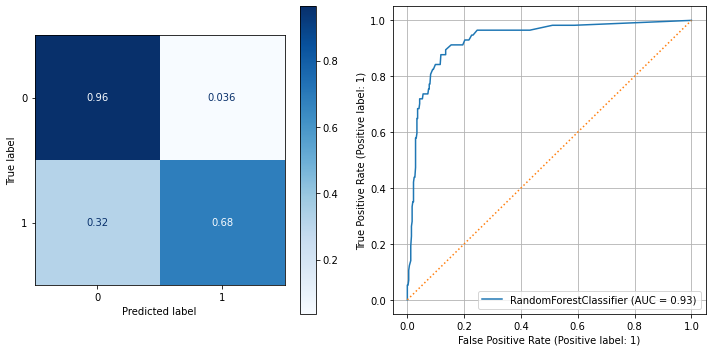

RandomForestClassifier()

In [52]:
rf = RandomForestClassifier()
pf.fit_and_time_model(rf,*train_test_list)

### To Get Expanations for Trees:



1. Create a shap explainer using your fit model.

```python
explainer = shap.TreeExplainer(xgb_clf)
```

2. Get shapely values from explainer for your training data

```python
shap_values = explainer.shap_values(X_train,y_train)
```            

3. Select which type of the available plots you'd like to visualize

    
- **Types of Plots:**
    - `summary_plot()`
    - `dependence_plot()`
    - `force_plot()` for a given observation
    - `force_plot()` for all data
    
  

In [53]:
# importances = pf.get_importance(rf,X_train_df,top_n=30)

In [54]:
## Initialize an explainer with the model
explainer = shap.TreeExplainer(rf)

## Calculaate shap values for test data
shap_values = explainer.shap_values(X_test_df,y_test)
len(shap_values)

2

In [55]:
shap_values[1].shape, X_test_df.shape

((472, 40), (472, 40))

### Summary Plot

```python
## For normal bar graph of importance:
shap.summary_plot(shap_values[1],X_train,plot_type='bar')

## For detail Shapely value visuals:
shap.summary_plot(shap_values, X_train)
```
  

**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


>- **IMPORTANT NOTE:** You may need to slice out the correct shap_values for the target class. (by default explainer.shap_values seems to return a list for a binary classification, one set of shap values for each class).
    - This will cause issues like the summary plot having a bar with an equal amount of blue and red for each class. 
    - To fix, slice out the correct matrix from shap_values [0,1]


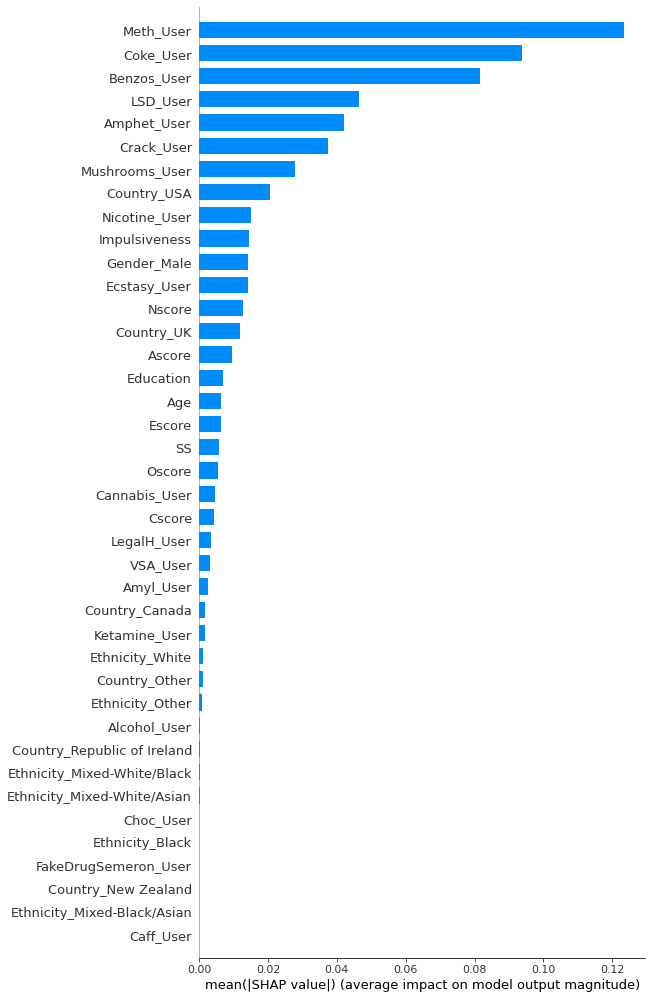

In [56]:
shap.summary_plot(shap_values[1], X_test_df,plot_type='bar',max_display=40)

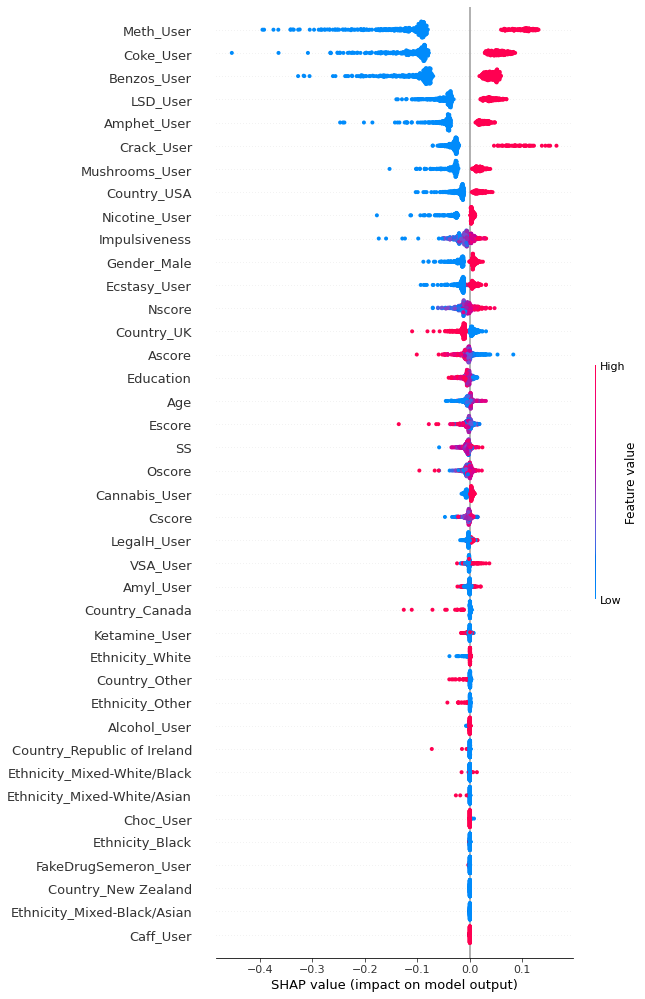

In [57]:
shap.summary_plot(shap_values[1],X_test_df,max_display=40)

### Force Plots

`shap.force_plot`

To show an individual data point's prediction and the factors pushing it towards one class or another

```python
## Just using np to randomly select a row
row = np.random.choice(range(len(X_train)))
                       
shap.force_plot(explainer.expected_value, shap_values[row,:], X_train.iloc[row,:])
```

#### Explain Individual Plot

In [58]:
target_lookup = {0:'Non-User',1:'Heroin User'}
target_lookup[0]

'Non-User'

In [59]:
row = np.random.choice(range(len(X_test_df)))
print(f"- Row #: {row}")
print(f"Class = {target_lookup[y_test.iloc[row]]}")
X_test_df.iloc[row].round(2)

- Row #: 38
Class = Non-User


Age                            0.20
Education                      0.75
Nscore                         0.35
Escore                         0.70
Oscore                         0.28
Ascore                         0.75
Cscore                         0.71
Impulsiveness                  0.43
SS                             0.39
Gender_Male                    1.00
Country_Canada                 0.00
Country_New Zealand            0.00
Country_Other                  0.00
Country_Republic of Ireland    0.00
Country_UK                     1.00
Country_USA                    0.00
Ethnicity_Black                0.00
Ethnicity_Mixed-Black/Asian    0.00
Ethnicity_Mixed-White/Asian    0.00
Ethnicity_Mixed-White/Black    0.00
Ethnicity_Other                0.00
Ethnicity_White                1.00
Alcohol_User                   1.00
Amphet_User                    0.00
Amyl_User                      0.00
Benzos_User                    0.00
Caff_User                      1.00
Cannabis_User               

In [60]:
## Individual forceplot
shap.force_plot(explainer.expected_value[1], shap_values[1][row],X_test_df.iloc[row])       

In [61]:
## Overall Forceplot
shap.force_plot(explainer.expected_value[1], shap_values[1],X_test_df)       

**`shap.dependence_plot`**


```python
## To Auto-Select Feature Most correlated with a specific feature, just pass the desired feature's column name.

shap.dependence_plot('super_dist', shap_values, X_train)

## There is a way to specifically call out multiple features but I wasn't able to summarize it quickly for this nb
```

In [64]:
X_test_df

Age  Education    Nscore    Escore    Oscore    Ascore    Cscore  \
1492  0.0      0.500  0.687500  0.000000  0.527778  0.437500  0.261905   
725   0.2      0.875  0.562500  0.651163  0.500000  0.666667  0.571429   
530   0.6      0.750  0.708333  0.302326  0.472222  0.687500  0.428571   
928   0.4      0.125  0.354167  0.441860  0.500000  0.666667  0.476190   
1144  0.2      0.750  0.041667  0.488372  0.388889  0.437500  0.738095   
...   ...        ...       ...       ...       ...       ...       ...   
937   0.0      0.500  0.583333  0.488372  0.805556  0.437500  0.571429   
177   0.4      0.750  0.791667  0.558140  0.361111  0.520833  0.761905   
919   0.0      0.500  0.270833  0.627907  0.805556  0.458333  0.666667   
1080  0.0      0.875  0.437500  0.627907  0.555556  0.687500  0.500000   
796   0.4      0.500  0.750000  0.651163  0.861111  0.708333  0.476190   

      Impulsiveness        SS  Gender_Male  Country_Canada  \
1492       0.809491  0.710933          1.0             0.0   
725        0.503573  0.465658          0.0             0.0   
530        0.428474  0.710933          1.0             0.0   
928        0.215401  0.308011          1.0             0.0   
1144       0.428474  0.539559          1.0             0.0   
...             ...       ...          ...             ...   
937        0.428474  0.710933          1.0             0.0   
177        0.337920  0.388117          0.0             0.0   
919        0.428474  0.825752          1.0             0.0   
1080       0.428474  0.465658          1.0             0.0   
796        0.809491  0.388117          0.0             0.0   

      Country_New Zealand  Country_Other  Country_Republic of Ireland  \
1492                  0.0            0.0                          0.0   
725                   0.0            0.0                          0.0   
530                   0.0            0.0                          0.0   
928                   0.0            0.0                          0.0   
1144                  0.0            0.0                          0.0   
...                   ...            ...                          ...   
937                   0.0            1.0                          0.0   
177                   0.0            0.0                          0.0   
919                   0.0            1.0                          0.0   
1080                  0.0            0.0                          0.0   
796                   0.0            0.0                          0.0   

      Country_UK  Country_USA  Ethnicity_Black  Ethnicity_Mixed-Black/Asian  \
1492         1.0          0.0              0.0                          0.0   
725          1.0          0.0              0.0                          0.0   
530          1.0          0.0              0.0                          0.0   
928          1.0          0.0              0.0                          0.0   
1144         0.0          1.0              0.0                          0.0   
...          ...          ...              ...                          ...   
937          0.0          0.0              0.0                          0.0   
177          1.0          0.0              0.0                          0.0   
919          0.0          0.0              0.0                          0.0   
1080         1.0          0.0              0.0                          0.0   
796          1.0          0.0              0.0                          0.0   

      Ethnicity_Mixed-White/Asian  Ethnicity_Mixed-White/Black  \
1492                          0.0                          0.0   
725                           0.0                          1.0   
530                           0.0                          0.0   
928                           0.0                          0.0   
1144                          0.0                          0.0   
...                           ...                          ...   
937                           0.0                          0.0   
177               

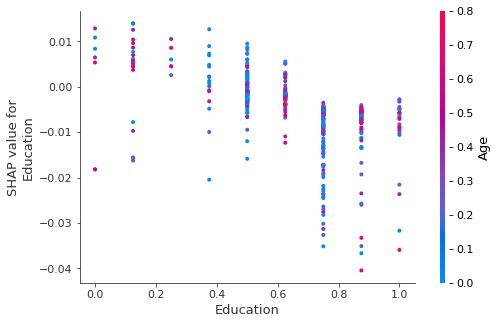

In [65]:
shap.dependence_plot('Education',shap_values[1],X_test_df,
                     interaction_index='Age')

### Using SHAP with SVMS: 

https://slundberg.github.io/shap/notebooks/Iris%20classification%20with%20scikit-learn.html**
- ~~Must run the SVC with `probability=True` to be able to use `.predict_proba`, which is needed for the `KernelExplainer`~~

[i] Training started at 05/20/22-15:00:52:
	Training time was 0.0375 seconds.

           Train  Test  Difference
accuracy   0.94  0.91        0.03 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       415
           1       0.60      0.75      0.67        57

    accuracy                           0.91       472
   macro avg       0.78      0.84      0.81       472
weighted avg       0.92      0.91      0.91       472



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


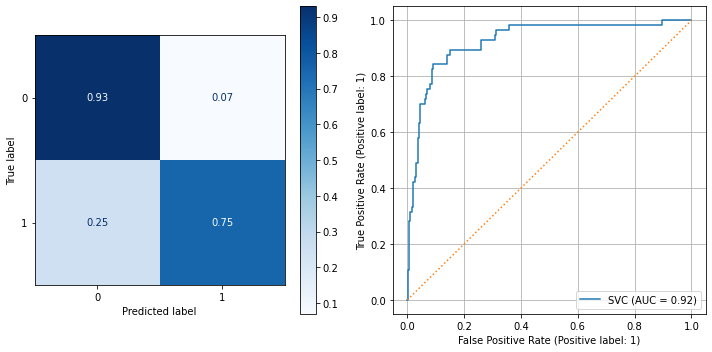

In [66]:
svc_linear = pf.fit_and_time_model(SVC(kernel='linear',C=1),#probability=True,
                                *train_test_list)

In [67]:
# pred_func = svc_linear.decision_function
X_shap = shap.sample(X_test_df,nsamples=200)
explainer = shap.KernelExplainer(svc_linear.predict,X_shap)
explainer

X does not have valid feature names, but SVC was fitted with feature names
Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [68]:
shap_values = explainer.shap_values(X_shap,nsamples=100)#, nsamples=1000)

  0%|          | 0/200 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprec

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprec

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Sta

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



In [69]:
shap_values.shape

(200, 40)

In [70]:
X_test_df.shape

(472, 40)

In [71]:
shap_values[0].shape

(40,)

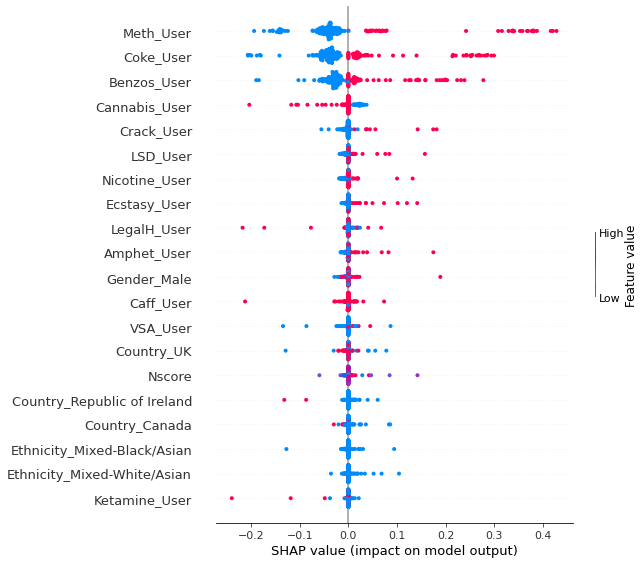

In [72]:
# # shap.force_plot(shap_values[0],X_test)
shap.summary_plot(shap_values,X_shap) 

In [73]:
# shap.summary_plot(shap_values,X_test,plot_type='bar')

## Explaining Models with LIME

>- LIME (Local Interpretable Model-Agnostic Explanations) 
    - GitHub: https://github.com/marcotcr/lime
    - [White Paper](https://arxiv.org/abs/1602.04938)

- [Blog Post:"ExplainYour Modelw ith LIME"](https://medium.com/dataman-in-ai/explain-your-model-with-lime-5a1a5867b423)

In [74]:
# !pip install lime
from lime.lime_tabular import LimeTabularExplainer

In [75]:
lime_explainer =LimeTabularExplainer(
    training_data=np.array(X_test_df),
    feature_names=X_train_df.columns,
    class_names=['Non-User', 'Heroin-User'],
    mode='classification'
)

In [76]:
row = np.random.choice(range(len(X_test_df)))
print(f"- Row #: {row}")
print(f"Class = {target_lookup[y_test.iloc[row]]}")
# X_test_df.iloc[row].round(2)    

- Row #: 305
Class = Non-User


In [77]:
exp = lime_explainer.explain_instance(X_test_df.iloc[row], rf.predict_proba)
exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


# Appendix

### Renaming Features

In [78]:
columns= {0:'ID',1:'Age',2:'Gender',3:'Education',4:'Country',5:'Ethnicity',
         6:'Nscore',7:'Escore',8:'Oscore',9:"Ascore",10:'Cscore',
         11:'Impulsiveness',12:'SS'}

drug_dict = {13:'Alcohol', 
              14: 'Amphet', 
              15: 'Amyl', 
              16: 'Benzos', 
              17: 'Caff', 
              18: 'Cannabis', 
              19: 'Choc', 
              20: 'Coke',
              21: 'Crack', 
              22: 'Ecstasy',
              23: 'Heroin', 
              24: 'Ketamine', 
              25: 'LegalH', 
              26: 'LSD',
              27: 'Meth',
              28: 'Mushrooms', 
              29: 'Nicotine', 
              30: "FakeDrugSemeron",
              31: 'VSA'}

all_columns = {**columns, **drug_dict}

drug_cols = list(drug_dict.values())
drug_cols

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'LegalH',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'FakeDrugSemeron',
 'VSA']

In [79]:

education, age, country,

NameError: name 'education' is not defined